# Model Building

# Import Libraries

In [4]:
import pandas as pd
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.ensemble import IsolationForest
import plotly.graph_objs as go
import plotly.tools as tls
import cufflinks
import cufflinks as cf
import plotly.figure_factory as ff
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, roc_auc_score
from sklearn.model_selection import StratifiedKFold, cross_val_score, KFold
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.metrics import silhouette_score
## Hyperopt modules
#from hyperopt import fmin, hp, tpe, Trials, space_eval, STATUS_OK, STATUS_RUNNING
#from functools import partial
from sklearn.metrics import roc_auc_score
import matplotlib.gridspec as gridspec
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
sns.set_palette("hls")
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import scipy
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.ensemble import IsolationForest
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import re
import sys
#preprocessing libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#ML libraries
import tensorflow as tf
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import re
import sys
#preprocessing libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#ML libraries
import tensorflow as tf
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import plot_importance, to_graphviz
from xgboost import plot_tree
#For Model Acuracy
from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from xgboost import plot_importance, to_graphviz #
from sklearn.metrics import classification_report
from yellowbrick.classifier import PrecisionRecallCurve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,roc_auc_score,accuracy_score,classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import log_loss

In [5]:
import plotly.express as px
import plotly.io as pio
pio.templates

Templates configuration
-----------------------
    Default template: 'plotly'
    Available templates:
        ['ggplot2', 'seaborn', 'simple_white', 'plotly',
         'plotly_white', 'plotly_dark', 'presentation', 'xgridoff',
         'ygridoff', 'gridon', 'none']

# Import Data

In [6]:
data = pd.read_csv('./new_balanced_data.csv')
data.shape

(1497084, 7)

In [7]:
data.head(6)

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,typeid,Fraud_Id
0,486889.15,259210.0,0.0,0.000000e+00,0.000000e+00,4,0
1,486889.15,259210.0,0.0,0.000000e+00,0.000000e+00,4,0
2,486889.15,259210.0,0.0,2.150636e+06,2.555206e+06,4,0
3,486889.15,259210.0,0.0,2.150636e+06,2.555206e+06,4,0
4,486889.15,259210.0,0.0,0.000000e+00,2.555206e+06,4,0
5,486889.15,259210.0,0.0,2.150636e+06,2.555206e+06,4,0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1497084 entries, 0 to 1497083
Data columns (total 7 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   amount          1497084 non-null  float64
 1   oldbalanceOrg   1497084 non-null  float64
 2   newbalanceOrig  1497084 non-null  float64
 3   oldbalanceDest  1497084 non-null  float64
 4   newbalanceDest  1497084 non-null  float64
 5   typeid          1497084 non-null  int64  
 6   Fraud_Id        1497084 non-null  int64  
dtypes: float64(5), int64(2)
memory usage: 80.0 MB


In [9]:
def color_(value):
    if value <= 1 :
        color = 'red'
    elif 400>value > 1 :
        color = 'blue'
    else:
        color = 'green'
    return 'color: %s' % color

data.describe().T.style.applymap(color_)

,count,mean,std,min,25%,50%,75%,max
amount,1497084.000000,164155.772837,139448.895791,0.000000,42414.522500,136762.530000,257630.025000,486889.150000
oldbalanceOrg,1497084.000000,26999.129896,55491.827146,0.000000,0.000000,2723.000000,24320.000000,259210.000000
newbalanceOrig,1497084.000000,8041.483560,52095.631597,0.000000,0.000000,0.000000,0.000000,360646.025000
oldbalanceDest,1497084.000000,759347.054679,936806.642345,0.000000,0.000000,174694.625000,2150636.281250,2150636.281250
newbalanceDest,1497084.000000,988097.763126,1063796.501683,0.000000,119382.515000,396841.250000,2555205.862500,2555205.862500
typeid,1497084.000000,1.522563,1.016844,0.000000,1.000000,1.000000,1.000000,4.000000
Fraud_Id,1497084.000000,0.500000,0.500000,0.000000,0.000000,0.500000,1.000000,1.000000


In [10]:
def color_(value):
    if value < 0 :
        color = 'red'
    elif value == 1 :
        color = 'blue'
    else:
        color = 'green'
    return 'color: %s' % color
data.select_dtypes('float').corr().style.applymap(color_)

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
amount,1.000000,0.374903,0.185321,0.286179,0.381113
oldbalanceOrg,0.374903,1.000000,0.644093,0.077455,0.115434
newbalanceOrig,0.185321,0.644093,1.000000,0.190670,0.192804
oldbalanceDest,0.286179,0.077455,0.190670,1.000000,0.988077
newbalanceDest,0.381113,0.115434,0.192804,0.988077,1.000000


In [11]:
data.typeid.value_counts()

1    1113136
3     247266
4     103876
0      28323
2       4483
Name: typeid, dtype: int64

## Data Splitting
## Scaling & Train&Test Split

In [12]:
X=data.drop(['Fraud_Id'],axis=1)
y=data[['Fraud_Id']]

In [13]:
X.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,typeid
0,486889.15,259210.0,0.0,0.000000e+00,0.000000e+00,4
1,486889.15,259210.0,0.0,0.000000e+00,0.000000e+00,4
2,486889.15,259210.0,0.0,2.150636e+06,2.555206e+06,4
3,486889.15,259210.0,0.0,2.150636e+06,2.555206e+06,4
4,486889.15,259210.0,0.0,0.000000e+00,2.555206e+06,4


In [14]:
y.head()

,Fraud_Id
0,0
1,0
2,0
3,0
4,0


### StandardScaler Transformation:

In [15]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=111)

#Standardizing the numerical columns
col_names=['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']
features_train = X_train[col_names]
features_test = X_test[col_names]
scaler = StandardScaler().fit(features_train.values)
features_train = scaler.transform(features_train.values)
features_test = scaler.transform(features_test.values)
X_train[col_names] = features_train
X_test[col_names] =features_test

In [16]:
X_train.shape,y_train.shape

((1047958, 6), (1047958, 1))

In [17]:
X_test.shape,y_test.shape

((449126, 6), (449126, 1))

In [18]:
X_train

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,typeid
1376996,2.314219,-0.107671,-0.154523,-0.810940,-0.462725,1
1222207,1.342020,1.474421,-0.154523,-0.615941,-0.427380,1
555224,2.049845,-0.486911,-0.154523,1.484206,1.472256,4
1149259,1.169350,1.448930,-0.154523,-0.602157,-0.437866,1
769431,0.955771,-0.297741,-0.154523,-0.131027,0.526177,1
...,...,...,...,...,...,...
942761,-0.991455,-0.103045,-0.154523,1.484206,1.472256,1
102486,-0.975900,-0.486911,-0.154523,1.484206,1.472256,1
135892,-0.165927,-0.280459,-0.154523,-0.810940,-0.796708,4
534484,-1.162615,-0.486911,-0.154523,-0.810940,-0.929348,3


In [19]:
sns.set_palette("hls")
plt.style.use('fivethirtyeight')

# Model Building
### Building ML models For classification:

     >Logistic Regression
     >Decision Tree Classifier
     >Random Forest Classifier
     >KNN Classifier
     >XGB Classifier
     >Support Vector Machine



## Various Model performance Metrics

**We will check different performance evaluation metrics on various models:**

 ->Confusion Matrix- The confusion matrix provides a base to define and develop any of the evaluation metrics. True Positive: Actually positive (ground truth), predicted as positive (correctly classified) True Negative: Actually negative (ground truth), predicted as negative (correctly classified) False Positive: Actually negative (ground truth), predicted as positive (misclassified) False Negative: Actually positive (ground truth), predicted as negative (misclassified)

->Accuracy- Accuracy can also be defined as the ratio of the number of correctly classified cases to the total of cases under evaluation. The best value of accuracy is 1 and the worst value is 0.

->Precision- Precision can be defined with respect to either of the classes. The precision of negative class is intuitively the ability of the classifier not to label as positive a sample that is negative. The precision of positive class is intuitively the ability of the classifier not to label as negative a sample that is positive. The best value of precision is 1 and the worst value is 0.

     *True Positives (TP) - These are the correctly predicted positive values which means that the value of actual class is yes and the value of predicted class is also yes. E.g. if actual class value indicates that this passenger survived and predicted class tells you the same thing.

     *True Negatives (TN) - These are the correctly predicted negative values which means that the value of actual class is no and value of predicted class is also no. E.g. if actual class says this passenger did not survive and predicted class tells you the same thing.

     *False positives and false negatives, these values occur when your actual class contradicts with the predicted class.

     *False Positives (FP) – When actual class is no and predicted class is yes. E.g. if actual class says this passenger did not survive but predicted class tells you that this passenger will survive.

     *False Negatives (FN) – When actual class is yes but predicted class in no. E.g. if actual class value indicates that this passenger survived and predicted class tells you that passenger will die.

->Recall- Recall can also be defined with respect to either of the classes. Recall of positive class is also termed sensitivity and is defined as the ratio of the True Positive to the number of actual positive cases. It can intuitively be expressed as the ability of the classifier to capture all the positive cases. It is also called the True Positive Rate (TPR).Recall of negative class is also termed specificity and is defined as the ratio of the True Negative to the number of actual negative cases. It can intuitively be expressed as the ability of the classifier to capture all the negative cases. It is also called True Negative Rate (TNR).The best value of recall is 1 and the worst value is 0.

->F1-score- F1-score is considered one of the best metrics for classification models regardless of class imbalance. F1-score is the weighted average of recall and precision of the respective class. Its best value is 1 and the worst value is 0.

->Precision-Recall Curve- The precision-recall curve is used for evaluating the performance of binary classification algorithms. It is often used in situations where classes are heavily imbalanced. Also like ROC curves, precision-recall curves provide a graphical representation of a classifier’s performance across many thresholds, rather than a single value (e.g., accuracy, f-1 score, etc.).Average precision is one way of calculating the area under the PR curve. Average precision indicates whether your model can correctly identify all the positive examples without accidentally marking too many negative examples as positive.

AUROC Curve-   AUC - ROC curve is a performance measurement for the classification problems at various threshold settings. ROC is a probability curve and AUC represents the degree or measure of separability. It tells how much the model is capable of distinguishing between classes. Higher the AUC, the better the model is at predicting 0s as 0s and 1s as 1s.

->Log-Loss - Log-loss is indicative of how close the prediction probability is to the corresponding actual/true value (0 or 1 in case of binary classification). The more the predicted probability diverges from the actual value, the higher is the log-loss value. A Log Loss of 0.69 may be good in a multiclass problem, but very bad in a binary biased case. This figure is obtained by predicting p = 0.5 for any class of a binary problem.Log Loss would not be the best metric to use in that unbalanced case.

### Creating User defined Functions:

#### Precision Recall Curve

In [20]:
#For Precision Recall Curve
def PRCurve(model):
  prc = PrecisionRecallCurve(model)
  prc.fit(X_train, y_train)
  avg_prc = prc.score(X_test, y_test)
  plt.legend(labels = ['Precision Recall Curve',"AP=%.3f"%avg_prc], loc = 'lower right', prop={'size': 14})
  plt.xlabel(xlabel = 'Recall', size = 14)
  plt.ylabel(ylabel = 'Precision', size = 14)
  plt.title(label = 'Precision Recall Curve', size = 16)



#### Multiple ROC Curve

In [21]:
def graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve of Classifiers', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_train, log_reg_pred)))
    plt.plot(knear_fpr, knear_tpr, label='KNears Neighbors Classifier Score: {:.4f}'.format(roc_auc_score(y_train, knears_pred)))
    plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_train, svc_pred)))
    plt.plot(tree_fpr, tree_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_train, tree_pred)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
    
    

#### Multi-class log-loss

In [22]:
#multi-class log-loss
def multiclass_logloss(actual, predicted, eps=1e-15):
    """Multi class version of Logarithmic Loss metric.
    :param actual: Array containing the actual target classes
    :param predicted: Matrix with class predictions, one probability per class
    """
    # Convert 'actual' to a binary array if it's not already:
    if len(actual.shape) == 1:
        actual2 = np.zeros((actual.shape[0], predicted.shape[1]))
        for i, val in enumerate(actual):
            actual2[i, val] = 1
        actual = actual2

    clip = np.clip(predicted, eps, 1 - eps)
    rows = actual.shape[0]
    vsota = np.sum(actual * np.log(clip))
    return -1.0 / rows * vsota




In [23]:
# Creating Empty List to Compare Different models:
Accuracy_cfm = []
Precision_cfm = []
Recall_cfm = []
Fscore_cfm =[]
logloss_cfm =[]

## 1. Logistic Regression

In [24]:
lr = LogisticRegression(solver='lbfgs',C=100.0)
lr.fit(X_train, y_train)
lr_train_predict=lr.predict(X_train)
lr_prediction = lr.predict(X_test)
lr_score = lr.score(X_test,y_test)
y_prob= lr.predict_proba(X_test)
print("Logistic Regression Train Accuracy: {}%".format(round(lr.score(X_train,y_train)*100,2)))
print("Logistic Regression Test Accuracy: {}%".format(round(lr.score(X_test,y_test)*100,2)))
lr_cm = confusion_matrix(y_test, lr_prediction)
print("Classification Report:Train Data\n")
print(classification_report(y_train, lr_train_predict))
print("-----------------------------------------------------------\n")
print("Classification Report:Test Data\n")
print(classification_report(y_test, lr_prediction))
print("-----------------------------------------------------------\n")
print("Logloss:\n",log_loss(y_test, lr.predict_proba(X_test)))
print('Confusion Matrix \n', lr_cm)


Logistic Regression Train Accuracy: 92.18%
Logistic Regression Test Accuracy: 92.25%
Classification Report:Train Data

              precision    recall  f1-score   support

           0       0.90      0.94      0.92    523288
           1       0.94      0.90      0.92    524670

    accuracy                           0.92   1047958
   macro avg       0.92      0.92      0.92   1047958
weighted avg       0.92      0.92      0.92   1047958

-----------------------------------------------------------

Classification Report:Test Data

              precision    recall  f1-score   support

           0       0.91      0.94      0.92    225254
           1       0.94      0.90      0.92    223872

    accuracy                           0.92    449126
   macro avg       0.92      0.92      0.92    449126
weighted avg       0.92      0.92      0.92    449126

-----------------------------------------------------------

Logloss:
 0.25545598747049586
Confusion Matrix 
 [[212605  12649]
 [ 221

In [25]:
#Accuracy
Accuracy_cfm.append(metrics.accuracy_score(y_test, lr_prediction) * 100)
#Precision
# Precision = TP / (TP + FP) (Where TP = True Positive, TN = True Negative, FP = False Positive, FN = False Negative).
Precision_cfm.append(precision_score(y_test, lr_prediction, pos_label=1))
#Recall
# Recall = TP / (TP + FN)
Recall_cfm.append(recall_score(y_test, lr_prediction, pos_label=1))
#f1-score
# F - scores are a statistical method for determining accuracy accounting for both precision and recall.
Fscore_cfm.append(f1_score(y_test,lr_prediction, pos_label=1))
#logloss
logloss_cfm.append(log_loss(y_test, lr.predict_proba(X_test)))



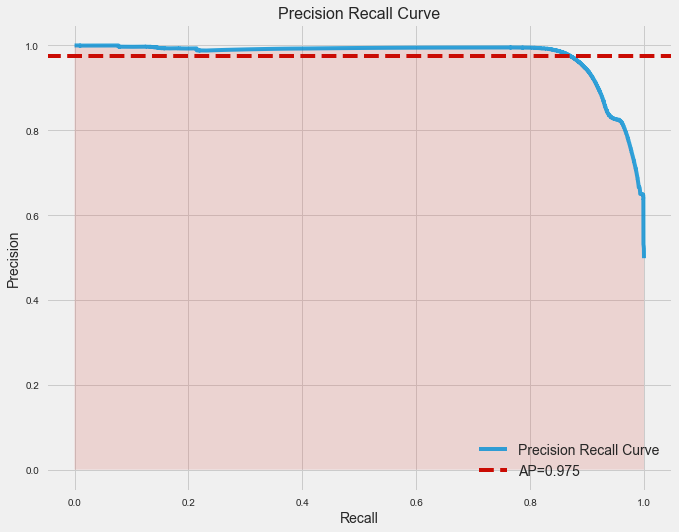

In [26]:
#Precision Recall Curve
plt.figure(figsize = [10, 8])
PRCurve(lr)
plt.show()

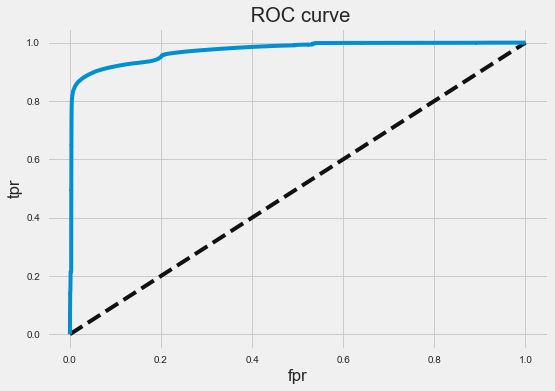

0.9730717752561897

In [27]:
y_pred_proba = lr.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='lr')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title(' ROC curve')
plt.show()

roc_auc_score(y_test,y_pred_proba)


####  Inference:

     The accuracy of the model is not good around 93%.
     The average precision score is  not satisfactory.
     The f1-score of the model is not satisfactory and Precision Recall Curve is not satisfactory.
     The confusion matrix is showing much  wrong prediction.



## 2.DecisionTreeClassifier

In [28]:
dt =DecisionTreeClassifier(criterion='entropy',
                        splitter='best',max_depth=4)
dt.fit(X_train, y_train)
dt_train_predict=dt.predict(X_train)
dt_prediction = dt.predict(X_test)
dt_score = dt.score(X_test, y_test)
print("Decision Tree Classification Train Accuracy: {}%".format(round(dt.score(X_train,y_train)*100,2)))
print("Decision Tree Classification Test Accuracy: {}%".format(round(dt.score(X_test,y_test)*100,2)))
dt_cm = confusion_matrix(y_test, dt_prediction)
print("Classification Report:Train data\n")
print(classification_report(y_train,dt_train_predict))
print("----------------------------------------------------\n")
print("Classification Report:Test data\n")
print(classification_report(y_test, dt_prediction))
print("----------------------------------------------------\n")
print("Logloss:\n",log_loss(y_test, dt.predict_proba(X_test)))
print('Confusion Matrix \n', dt_cm)


Decision Tree Classification Train Accuracy: 99.94%
Decision Tree Classification Test Accuracy: 99.94%
Classification Report:Train data

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    523288
           1       1.00      1.00      1.00    524670

    accuracy                           1.00   1047958
   macro avg       1.00      1.00      1.00   1047958
weighted avg       1.00      1.00      1.00   1047958

----------------------------------------------------

Classification Report:Test data

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    225254
           1       1.00      1.00      1.00    223872

    accuracy                           1.00    449126
   macro avg       1.00      1.00      1.00    449126
weighted avg       1.00      1.00      1.00    449126

----------------------------------------------------

Logloss:
 0.003058210517209675
Confusion Matrix 
 [[225249      5]
 

In [29]:
#Accuracy
Accuracy_cfm.append(metrics.accuracy_score(y_test, dt_prediction) * 100)
#Precision
# Precision = TP / (TP + FP) (Where TP = True Positive, TN = True Negative, FP = False Positive, FN = False Negative).
Precision_cfm.append(precision_score(y_test, dt_prediction, pos_label=1))
#Recall
# Recall = TP / (TP + FN)
Recall_cfm.append(recall_score(y_test, dt_prediction, pos_label=1))
#f1-score
# F - scores are a statistical method for determining accuracy accounting for both precision and recall.
Fscore_cfm.append(f1_score(y_test,dt_prediction, pos_label=1))
#logloss
logloss_cfm.append(log_loss(y_test, dt.predict_proba(X_test)))


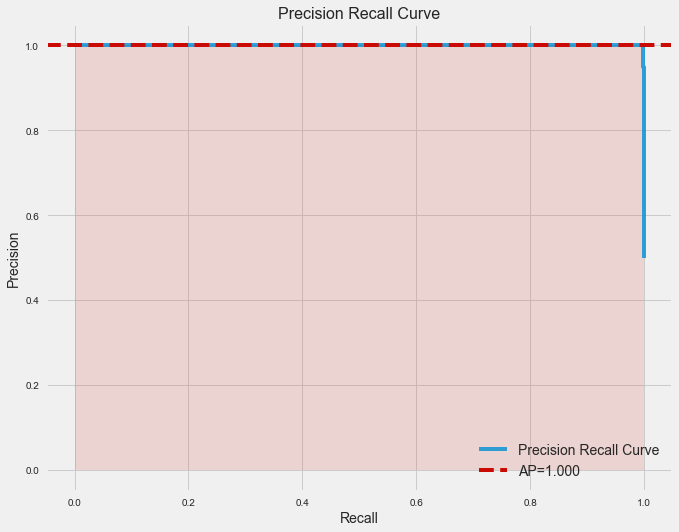

In [30]:
#Precision Recall Curve
plt.figure(figsize = [10, 8])
PRCurve(dt)
plt.show()

Area Under the Curve[AUC]:  0.9999649750381469


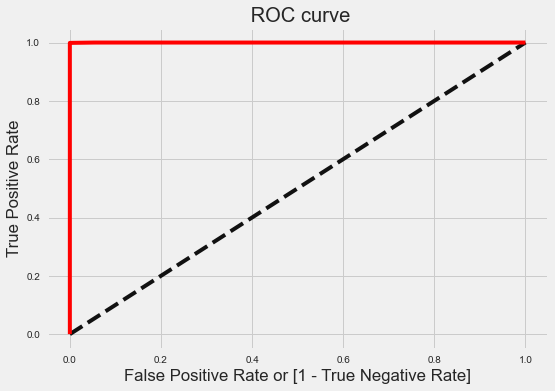

0.9999649750381469

In [31]:
#from sklearn.metrics import roc_curve
y_pred_proba = dt.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc=roc_auc_score(y_test,y_pred_proba)
print('Area Under the Curve[AUC]: ',auc)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr ,color='red',label='logit model ( area  = %0.2f)'%auc)
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title(' ROC curve')
plt.show()

roc_auc_score(y_test,y_pred_proba)

#### Inference:

     The accuracy of the model is very good around 100%.
     The average precision score is very good.
     The f1-score of the model is good and Precision Recall Curve is also very good.
     The confusion matrix is showing less wrong prediction.



## 3. KNNeighbors Classifier

KNN Classification Train Accuracy: 98.93%
KNN Classification Test Accuracy: 98.74%
Classification Report:Train data

              precision    recall  f1-score   support

           0       0.98      1.00      0.99    523288
           1       1.00      0.98      0.99    524670

    accuracy                           0.99   1047958
   macro avg       0.99      0.99      0.99   1047958
weighted avg       0.99      0.99      0.99   1047958

------------------------------------------------------------

Classification Report:Test data

              precision    recall  f1-score   support

           0       0.98      1.00      0.99    225254
           1       1.00      0.98      0.99    223872

    accuracy                           0.99    449126
   macro avg       0.99      0.99      0.99    449126
weighted avg       0.99      0.99      0.99    449126

----------------------------------------------------

Logloss:
 0.15812295569502333
Confusion Matrix 
 [[224443    811]
 [  4830 21904

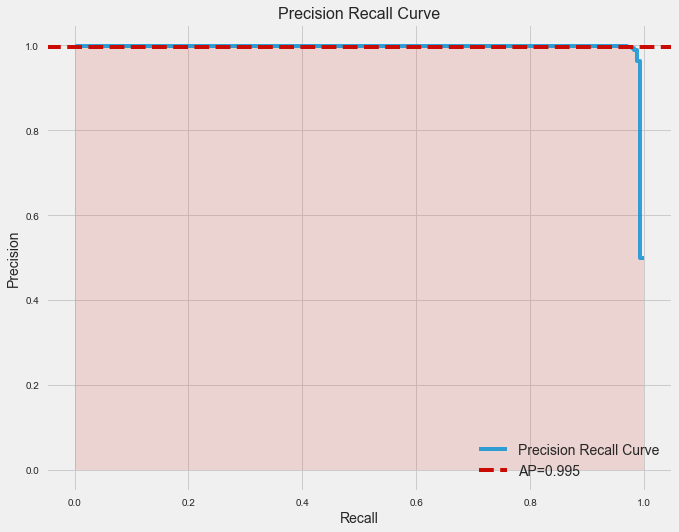

In [32]:
knn =KNeighborsClassifier(n_neighbors=7,metric='minkowski')
knn.fit(X_train, y_train)
knn_train_predict=knn.predict(X_train)

knn_prediction = knn.predict(X_test)
knn_score = knn.score(X_test, y_test)
print("KNN Classification Train Accuracy: {}%".format(round(knn.score(X_train,y_train)*100,2)))
print("KNN Classification Test Accuracy: {}%".format(round(knn.score(X_test,y_test)*100,2)))
knn_cm = confusion_matrix(y_test, knn_prediction)
print('Classification Report:Train data\n')
print(classification_report(y_train, knn_train_predict))
print("------------------------------------------------------------\n")
print('Classification Report:Test data\n')

print(classification_report(y_test, knn_prediction))

print("----------------------------------------------------\n")
print("Logloss:\n",log_loss(y_test, knn.predict_proba(X_test)))
print('Confusion Matrix \n', knn_cm)
#Precision Recall Curve
plt.figure(figsize = [10, 8])
PRCurve(knn)
plt.show()


In [33]:
#Accuracy
Accuracy_cfm.append(metrics.accuracy_score(y_test, knn_prediction) * 100)
#Precision
# Precision = TP / (TP + FP) (Where TP = True Positive, TN = True Negative, FP = False Positive, FN = False Negative).
Precision_cfm.append(precision_score(y_test, knn_prediction, pos_label=1))
#Recall
# Recall = TP / (TP + FN)
Recall_cfm.append(recall_score(y_test, knn_prediction, pos_label=1))
#f1-score
# F - scores are a statistical method for determining accuracy accounting for both precision and recall.
Fscore_cfm.append(f1_score(y_test,knn_prediction, pos_label=1))
#logloss
logloss_cfm.append(log_loss(y_test, knn.predict_proba(X_test)))

Area Under the Curve[AUC]:  0.9955847366704259


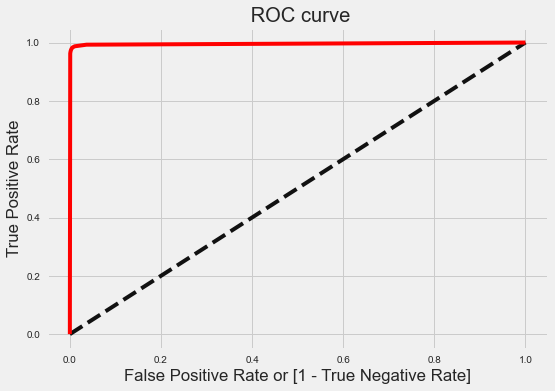

In [34]:
#from sklearn.metrics import roc_curve
y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc=roc_auc_score(y_test,y_pred_proba)
print('Area Under the Curve[AUC]: ',auc)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr ,color='red',label='logit model ( area  = %0.2f)'%auc)
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title(' ROC curve')
plt.show()


####  Inference:

     The accuracy of the model is good around 99%.
     The average precision score is very good.
     The f1-score of the model is good and Precision Recall Curve is also very good.
     The confusion matrix is showing some wrong prediction.



## 4.RandomForest Classifier

Random Forest Classification Train Accuracy: 99.96%
Random Forest Classification Test Accuracy: 99.96%
Classification Report:Train data

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    523288
           1       1.00      1.00      1.00    524670

    accuracy                           1.00   1047958
   macro avg       1.00      1.00      1.00   1047958
weighted avg       1.00      1.00      1.00   1047958

------------------------------------------------------------

Classification Report:Test data

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    225254
           1       1.00      1.00      1.00    223872

    accuracy                           1.00    449126
   macro avg       1.00      1.00      1.00    449126
weighted avg       1.00      1.00      1.00    449126

----------------------------------------------------

Logloss:
 0.052897966509121305
Confusion Matrix 
 [[225246  

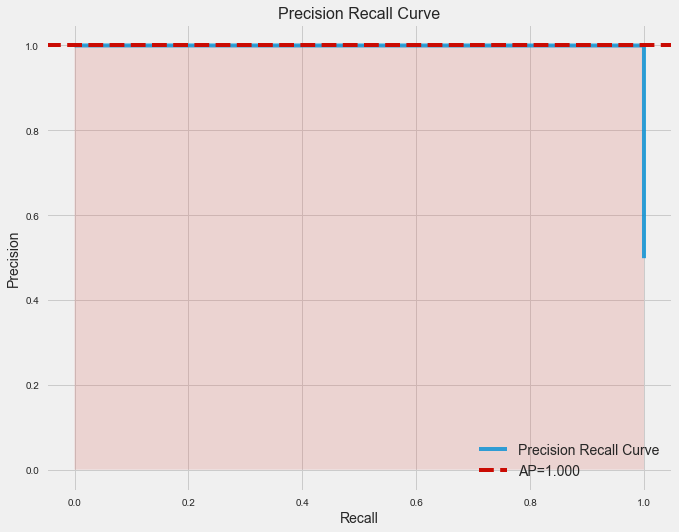

In [35]:
rf =RandomForestClassifier(n_estimators=100,criterion='entropy',max_depth=4,
                            max_features='auto',random_state=None,class_weight="balanced")
rf.fit(X_train, y_train)
rf_train_predict=rf.predict(X_train)
rf_prediction = rf.predict(X_test)
rf_score = rf.score(X_test, y_test)
print("Random Forest Classification Train Accuracy: {}%".format(round(rf.score(X_train,y_train)*100,2)))
print("Random Forest Classification Test Accuracy: {}%".format(round(rf.score(X_test,y_test)*100,2)))
rf_cm = confusion_matrix(y_test, rf_prediction)
print("Classification Report:Train data\n")
print(classification_report(y_train,rf_train_predict))
print("------------------------------------------------------------\n")
print("Classification Report:Test data\n")
print(classification_report(y_test, rf_prediction))

print("----------------------------------------------------\n")
print("Logloss:\n",log_loss(y_test, rf.predict_proba(X_test)))
print('Confusion Matrix \n', rf_cm)
#Precision Recall Curve
plt.figure(figsize = [10, 8])
PRCurve(rf)
plt.show()

In [36]:
#Accuracy
Accuracy_cfm.append(metrics.accuracy_score(y_test, rf_prediction) * 100)
#Precision
# Precision = TP / (TP + FP) (Where TP = True Positive, TN = True Negative, FP = False Positive, FN = False Negative).
Precision_cfm.append(precision_score(y_test, rf_prediction, pos_label=1))
#Recall
# Recall = TP / (TP + FN)
Recall_cfm.append(recall_score(y_test, rf_prediction, pos_label=1))
#f1-score
# F - scores are a statistical method for determining accuracy accounting for both precision and recall.
Fscore_cfm.append(f1_score(y_test,rf_prediction, pos_label=1))
#logloss
logloss_cfm.append(log_loss(y_test, rf.predict_proba(X_test)))

Area Under the Curve[AUC]:  0.9999969116303656


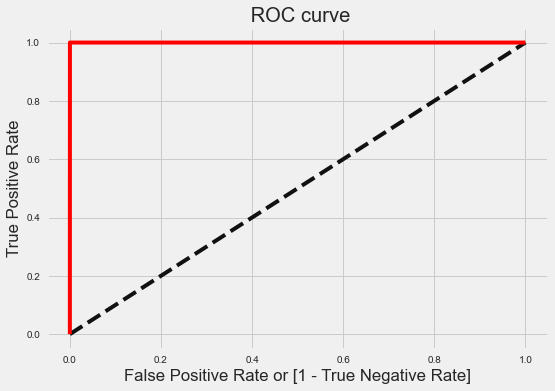

In [37]:
#from sklearn.metrics import roc_curve
y_pred_proba = rf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc=roc_auc_score(y_test,y_pred_proba)
print('Area Under the Curve[AUC]: ',auc)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr ,color='red',label='logit model ( area  = %0.2f)'%auc)
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title(' ROC curve')
plt.show()

#### Inference:

      The accuracy of the model is good around 99%.
      The average precision score is very good.
      The f1-score of the model is good and Precision Recall Curve is also very good.
      The confusion matrix is showing less wrong prediction.



##  5.XGBoost Classifier



XGB Classification Train Accuracy: 100.0%
XGB Classification Test Accuracy: 100.0%
Classification Report:Train data

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    523288
           1       1.00      1.00      1.00    524670

    accuracy                           1.00   1047958
   macro avg       1.00      1.00      1.00   1047958
weighted avg       1.00      1.00      1.00   1047958

------------------------------------------------------

Classification Report:Test data

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    225254
           1       1.00      1.00      1.00    223872

    accuracy                           1.00    449126
   macro avg       1.00      1.00      1.00    449126
weighted avg       1.00      1.00      1.00    449126

----------------------------------------------------

Logloss:
 0.2030656736904793
Confusion Matrix 
 [[225248      6]
 [     8 223864]]


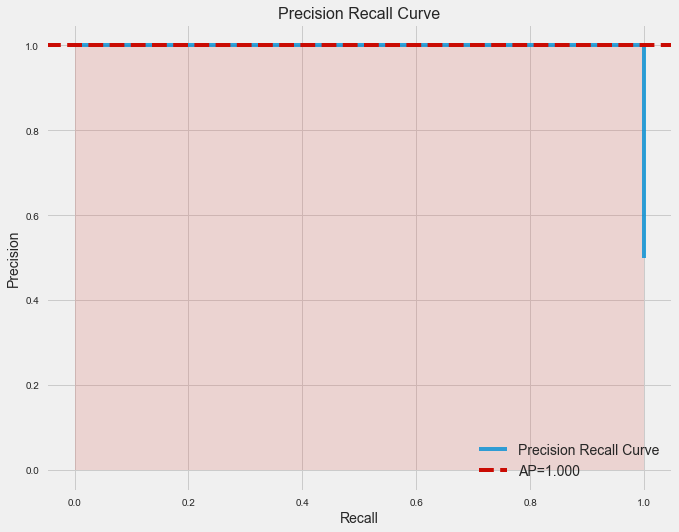

In [38]:
xgb_classifer= XGBClassifier(n_estimators=200,max_depth=6,booster="gbtree",learning_rate=0.005)
xgb_classifer.fit(X_train,y_train)
xgb_train_predict=xgb_classifer.predict(X_train)
xgb_prediction = xgb_classifer.predict(X_test)
xgb_score = xgb_classifer.score(X_test, y_test)
print("\n")
print("XGB Classification Train Accuracy: {}%".format(round(xgb_classifer.score(X_train,y_train)*100,2)))
print("XGB Classification Test Accuracy: {}%".format(round(xgb_classifer.score(X_test,y_test)*100,2)))
xgb_classifer_cm = confusion_matrix(y_test, xgb_prediction)
print("Classification Report:Train data\n")
print(classification_report(y_train, xgb_train_predict))
print("------------------------------------------------------\n")
print("Classification Report:Test data\n")
print(classification_report(y_test, xgb_prediction))

print("----------------------------------------------------\n")
print("Logloss:\n",log_loss(y_test, xgb_classifer.predict_proba(X_test)))
print('Confusion Matrix \n', xgb_classifer_cm)
#Precision Recall Curve
plt.figure(figsize = [10, 8])
PRCurve(xgb_classifer)
plt.show()

In [39]:
#Accuracy
Accuracy_cfm.append(metrics.accuracy_score(y_test, xgb_prediction) * 100)
#Precision
# Precision = TP / (TP + FP) (Where TP = True Positive, TN = True Negative, FP = False Positive, FN = False Negative).
Precision_cfm.append(precision_score(y_test, xgb_prediction, pos_label=1))
#Recall
# Recall = TP / (TP + FN)
Recall_cfm.append(recall_score(y_test, xgb_prediction, pos_label=1))
#f1-score
# F - scores are a statistical method for determining accuracy accounting for both precision and recall.
Fscore_cfm.append(f1_score(y_test,xgb_prediction, pos_label=1))
#logloss
logloss_cfm.append(log_loss(y_test, xgb_classifer.predict_proba(X_test)))

Area Under the Curve[AUC]:  0.9999967808103509


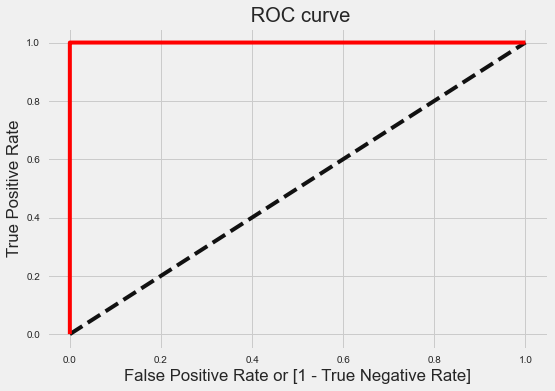

In [40]:
#from sklearn.metrics import roc_curve
y_pred_proba = xgb_classifer.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc=roc_auc_score(y_test,y_pred_proba)
print('Area Under the Curve[AUC]: ',auc)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr ,color='red',label='logit model ( area  = %0.2f)'%auc)
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title(' ROC curve')
plt.show()

####  Inference:

       The accuracy of the model for train and test is same 99.7%.
       The average precision score is very good.
       The f1-score of the model is good and Precision Recall Curve is also very good.
       The confusion matrix is showing less wrong prediction.


## Learning Curves to Diagnose Machine Learning Model Performance:

### A learning curve is a plot of model learning performance over experience or time 

Learning curves are a widely used diagnostic tool in machine learning for algorithms that learn from a training dataset incrementally. The model can be evaluated on the training dataset and on a hold out validation dataset after each update during training and plots of the measured performance can created to show learning curves.

Reviewing learning curves of models during training can be used to diagnose problems with learning, such as an underfit or overfit model, as well as whether the training and validation datasets are suitably representative.


During the training of a machine learning model, the current state of the model at each step of the training algorithm can be evaluated. It can be evaluated on the training dataset to give an idea of how well the model is “learning.” It can also be evaluated on a hold-out validation dataset that is not part of the training dataset. Evaluation on the validation dataset gives an idea of how well the model is “generalizing.”

    >Train Learning Curve: Learning curve calculated from the training dataset that gives an idea of how well the           model is learning.
    >Validation Learning Curve: Learning curve calculated from a hold-out validation dataset that gives an idea of how       well the model is generalizing.

There are three common dynamics that you are likely to observe in learning curves; they are:

    1)Underfit.
    2)Overfit.
    3)Good Fit.


In [41]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.model_selection import StratifiedKFold, train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


In [42]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """Plot the learning curve for the estinmator."""
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fig = go.Figure()
    fig.add_trace(go.Scatter(name='Training score - Standard Deviation',
                            x=train_sizes,
                            y=train_scores_mean+train_scores_std,
                            mode='lines',
                            showlegend=False,
                            marker=dict(color='green')))
    fig.add_trace(go.Scatter(name='Training score',
                            x=train_sizes,
                            y=train_scores_mean,
                            fill='tonexty',
                            mode='lines+markers',
                            marker=dict(color='green')))
    fig.add_trace(go.Scatter(name='Training score + Standard Deviation',
                            x=train_sizes,
                            y=train_scores_mean-train_scores_std,
                            mode='lines',
                            fill='tonexty',
                            showlegend=False,
                            marker=dict(color='green')))
    fig.add_trace(go.Scatter(x=train_sizes,
                            y=test_scores_mean+test_scores_std,
                            mode='lines',
                            showlegend=False,
                            marker=dict(color='red')))
    fig.add_trace(go.Scatter(name='Validation Score',
                            x=train_sizes,
                            y=test_scores_mean,
                            mode='lines+markers',
                            fill='tonexty',
                            marker=dict(color='red')))
    fig.add_trace(go.Scatter(x=train_sizes,
                            y=test_scores_mean-test_scores_std,
                            mode='lines',
                            fill='tonexty',
                            showlegend=False,
                            marker=dict(color='red')))

    fig.update_layout(width=700,height=400,template='seaborn',title=title,
                        margin=dict(l=60,r=0,b=0,t=40),legend=dict(orientation='h',x=0.5,y=1),
                        xaxis=dict(title='Training examples',mirror=True,linecolor='black',linewidth=2),
                        yaxis=dict(title='Scores',range=ylim if ylim is not None else None,
                        mirror=True,linecolor='black',linewidth=2))
    return fig

### PLotting Learning curves for Different Algorithms:

In [43]:
plot_learning_curve(lr, 'LOgistic Regression', X_train, y_train)

In [44]:
plot_learning_curve(dt, 'DecisionTree Classifier', X_train, y_train)

In [45]:
plot_learning_curve(rf, 'RandomForestClassifier', X_test, y_test)

In [46]:
plot_learning_curve(knn, 'KNearestNeighbour', X_test, y_test)

## Classification Models comparative Study

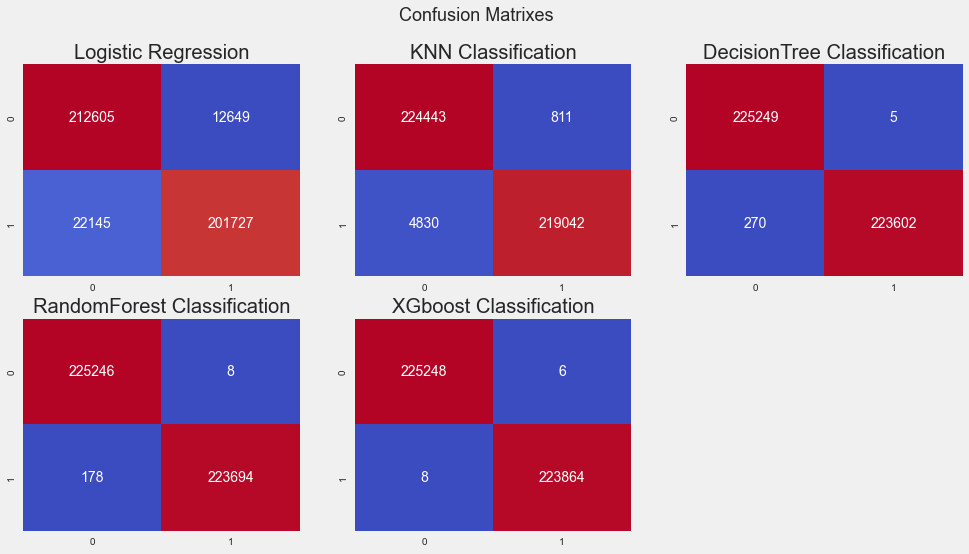

In [47]:
plt.figure(figsize=(15,8))
plt.suptitle("Confusion Matrixes", fontsize=18)

plt.subplot(2,3,1)
plt.title("Logistic Regression")
sns.heatmap(lr_cm, cbar=False, annot=True, cmap="coolwarm", fmt="d")

plt.subplot(2,3,2)
plt.title("KNN Classification")
sns.heatmap(knn_cm, cbar=False, annot=True, cmap="coolwarm", fmt="d")

plt.subplot(2,3,3)
plt.title("DecisionTree Classification")
sns.heatmap(dt_cm, cbar=False, annot=True, cmap="coolwarm", fmt="d")

plt.subplot(2,3,4)
plt.title("RandomForest Classification")
sns.heatmap(rf_cm, cbar=False, annot=True, cmap="coolwarm", fmt="d")

plt.subplot(2,3,5)
plt.title("XGboost Classification")
sns.heatmap(xgb_classifer_cm, cbar=False, annot=True, cmap="coolwarm", fmt="d")

plt.show()

### ROC-AUC plot Comparison

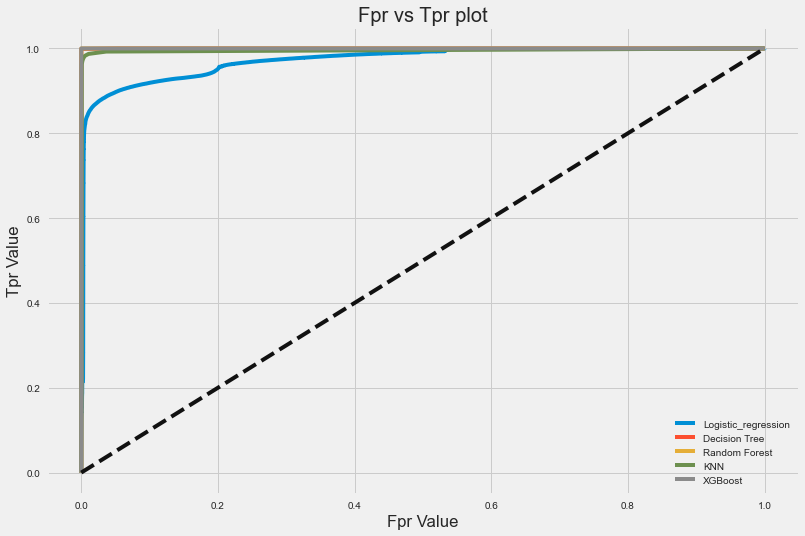

In [48]:
# Calculate FPR, TPR, THRESHOLD for Logistic Regression Model 
y_pred_probalog = lr.predict_proba(X_test)[:,1]
fprlog, tprlog, thresholdslog = roc_curve(y_test, y_pred_probalog)

# Calculate FPR, TPR, THRESHOLD for Decision Tree Model 
y_pred_probadt = dt.predict_proba(X_test)[:,1]
fprdt, tprdt, thresholdsdt = roc_curve(y_test, y_pred_probadt)

# Calculate FPR, TPR, THRESHOLD for Random Forest Model 
y_pred_probarf = rf.predict_proba(X_test)[:,1]
fprrf, tprrf, thresholdsrf = roc_curve(y_test, y_pred_probarf)
# Calculate FPR, TPR, THRESHOLD for knn
y_pred_probaknn = knn.predict_proba(X_test)[:,1]
fprknn, tprknn, thresholdsknn = roc_curve(y_test, y_pred_probaknn)
# Calculate FPR, TPR, THRESHOLD for xgboost
y_pred_probaxgb = xgb_classifer.predict_proba(X_test)[:,1]
fprxgb, tprxgb, thresholdsxgb = roc_curve(y_test, y_pred_probaxgb)


roc_plot_df = pd.DataFrame({
    "FPR": [fprlog, fprdt, fprrf,fprknn,fprxgb],
    "TPR": [tprlog, tprdt, tprrf,tprknn,tprxgb],
})


fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(fprlog,tprlog)
ax.plot(fprdt,tprdt)
ax.plot(fprrf,tprrf)
ax.plot(fprknn,tprknn)
ax.plot(fprxgb,tprxgb)
ax.plot([0,1],[0,1],'k--')
ax.grid(True)
ax.set_title('Fpr vs Tpr plot')
ax.legend(['Logistic_regression', 'Decision Tree', 'Random Forest','KNN','XGBoost'])
ax.xaxis.set_label_text('Fpr Value')
ax.yaxis.set_label_text('Tpr Value')

plt.show()



In [49]:
TN = [lr_cm[0,0], knn_cm[0,0],   dt_cm[0,0], rf_cm[0,0],xgb_classifer_cm[0,0]]
FP = [lr_cm[0,1], knn_cm[0,1],   dt_cm[0,1], rf_cm[0,1],xgb_classifer_cm[0,1]]
FN = [lr_cm[1,0], knn_cm[1,0],   dt_cm[1,0], rf_cm[1,0],xgb_classifer_cm[1,0]]
TP = [lr_cm[1,1], knn_cm[1,1],   dt_cm[1,1], rf_cm[1,1],xgb_classifer_cm[1,1]]
Accuracy = [lr_score, knn_score,  dt_score, rf_score,xgb_score]
#MSE = [lr_mse, knn_mse, svm_mse, nb_mse, dt_mse, rf_mse]
Classification = ["Logistic Regression", "KNN Classification", 
                  "Decision Tree Classification", "Random Forest Classification","Xgboost Classifier"]
list_matrix = [Classification, TN, FP, FN, TP, Accuracy]
list_headers = ["Model", "TN", "FP", "FN", "TP", "Accuracy"]
zipped = list(zip(list_headers, list_matrix))
data_dict = dict(zipped)
df_123=pd.DataFrame(data_dict)



In [50]:
df_123

,Model,TN,FP,FN,TP,Accuracy
0,Logistic Regression,212605,12649,22145,201727,0.922530
1,KNN Classification,224443,811,4830,219042,0.987440
2,Decision Tree Classification,225249,5,270,223602,0.999388
3,Random Forest Classification,225246,8,178,223694,0.999586
4,Xgboost Classifier,225248,6,8,223864,0.999969


In [51]:
trace1 = {
    'x':df_123.Model,
    'y':df_123.TN,
    'name':'True Negative',
    'type':'bar'}

trace2 = {
    'x':df_123.Model,
    'y':df_123.FP,
    'name':'False Positive',
    'type':'bar'}

trace3 = {
    'x':df_123.Model,
    'y':df_123.FN,
    'name':'False Negative',
    'type':'bar'}

trace4 = {
    'x':df_123.Model,
    'y':df_123.TP,
    'name':'True Positive',
    'type':'bar'}

graph = [trace1, trace2, trace3, trace4];
layout = {
  'xaxis': {'title': 'Classification Models'},
  'barmode': 'relative',
  'title': 'Confusion Matrix Values of Classification Models'
};
fig = go.Figure(data = graph, layout = layout)
iplot(fig)

In [52]:
df_scale_1= pd.DataFrame(Accuracy_cfm, index= ['Logistic Regression',
                                                      'Decision Tree Classifier', 
                                                      'KNN Classifier',
                                                      'Random Forest Classifier ', 
                                                      'XGB Classifier '
                                                     ], 
                              columns=['Accuracy']) 
df_scale_2= pd.DataFrame(Precision_cfm, index= ['Logistic Regression',
                                                      'Decision Tree Classifier', 
                                                      'KNN Classifier',
                                                      'Random Forest Classifier ', 
                                                      'XGB Classifier '
                                                     ], 
                              columns=['Precision'])
df_scale_3= pd.DataFrame(Recall_cfm, index= ['Logistic Regression',
                                                      'Decision Tree Classifier', 
                                                      'KNN Classifier',
                                                      'Random Forest Classifier ', 
                                                      'XGB Classifier '
                                                     ], 
                              columns=['Recall'])
df_scale_4= pd.DataFrame(Fscore_cfm, index= ['Logistic Regression',
                                                      'Decision Tree Classifier', 
                                                      'KNN Classifier',
                                                      'Random Forest Classifier ', 
                                                      'XGB Classifier '
                                                     ], 
                              columns=['F1_score'])
df_scale_5= pd.DataFrame(logloss_cfm, index= ['Logistic Regression',
                                                      'Decision Tree Classifier', 
                                                      'KNN Classifier',
                                                      'Random Forest Classifier ', 
                                                      'XGB Classifier '
                                                     ], 
                              columns=['log-loss'])

In [53]:
Model_scale = pd.concat([df_scale_1, df_scale_2,df_scale_3, 
                         df_scale_4, df_scale_5], axis=1)

In [54]:
Model_scale.sort_values(by=['Accuracy'], ascending=False)

,Accuracy,Precision,Recall,F1_score,log-loss
XGB Classifier,99.996883,0.999973,0.999964,0.999969,0.203066
Random Forest Classifier,99.958586,0.999964,0.999205,0.999584,0.052898
Decision Tree Classifier,99.938770,0.999978,0.998794,0.999385,0.003058
KNN Classifier,98.744005,0.996311,0.978425,0.987287,0.158123
Logistic Regression,92.252954,0.940996,0.901082,0.920607,0.255456


### Accuracy Comparison For Diffrent Models

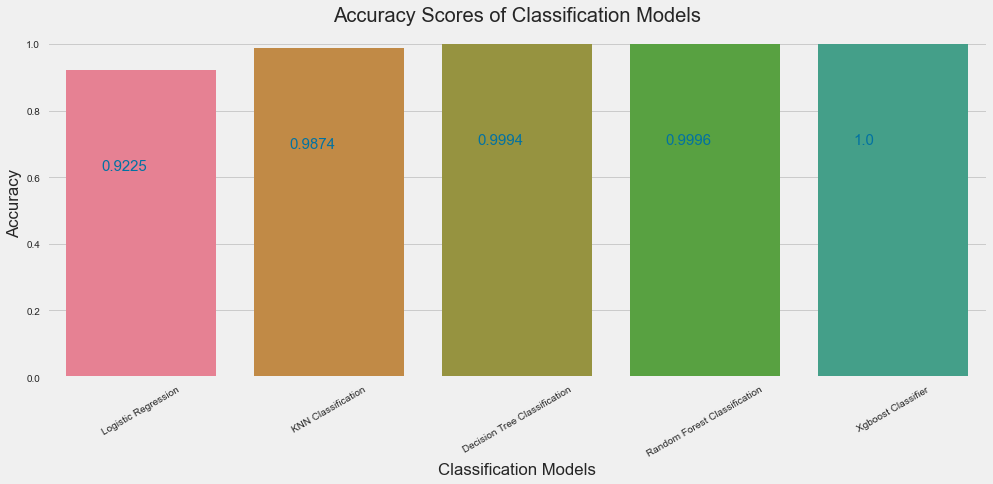

In [55]:
#Accuracy
plt.figure(figsize=(15,6))
ax= sns.barplot(x=df_123.Model, y=df_123.Accuracy, palette =sns.color_palette("husl", 9) )
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.xlabel('Classification Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Scores of Classification Models')
for i in ax.patches:
    ax.text(i.get_x()+.19, i.get_height()-0.3, \
            str(round((i.get_height()), 4)), fontsize=15, color='b')
plt.show()

## Finalizing Model Choice & Training with complete data

### Final Model :
Observations:

    ->The accuracy of the XGBoost model for train and test is same .
   
    ->The average precision score is very good.
   
    ->The f1-score of the model is good and Precision Recall Curve is also very good.
   
    ->The confusion matrix is showing less wrong prediction.

So We Choose XGBoost as our Final Model

### Training with complete data



XGB Classification  Accuracy: 100.0%
Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    748542
           1       1.00      1.00      1.00    748542

    accuracy                           1.00   1497084
   macro avg       1.00      1.00      1.00   1497084
weighted avg       1.00      1.00      1.00   1497084

------------------------------------------------------

Confusion Matrix 
 [[748532     10]
 [    22 748520]]
----------------------------------------------------

Logloss:
 0.20304712841269484


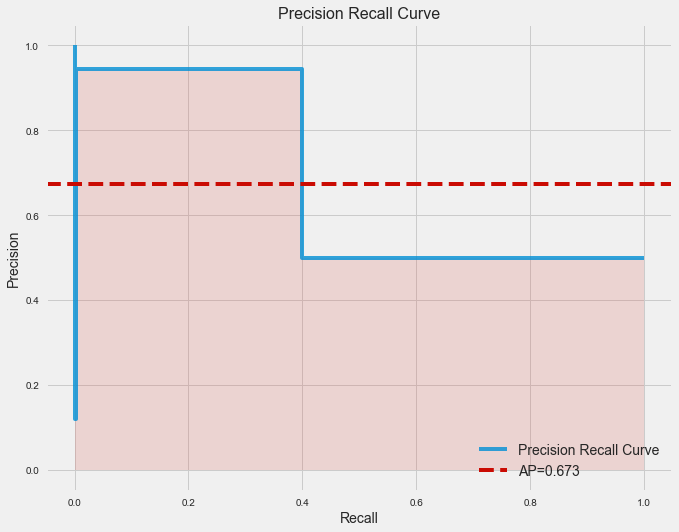

In [56]:
xgb_classifer= XGBClassifier(n_estimators=200,max_depth=6,booster="gbtree",learning_rate=0.005)
xgb_classifer.fit(X,y)
xgb_train_predict=xgb_classifer.predict(X)
print("\n")
print("XGB Classification  Accuracy: {}%".format(round(xgb_classifer.score(X,y)*100,2)))
xgb_classifer_cm = confusion_matrix(y, xgb_train_predict)
print("Classification Report:\n")
print(classification_report(y, xgb_train_predict))
print("------------------------------------------------------\n")
print('Confusion Matrix \n', xgb_classifer_cm)
print("----------------------------------------------------\n")
print("Logloss:\n",log_loss(y, xgb_classifer.predict_proba(X)))

#Precision Recall Curve
plt.figure(figsize = [10, 8])
PRCurve(xgb_classifer)
plt.show()

Area Under the Curve[AUC]:  0.9999963285633291


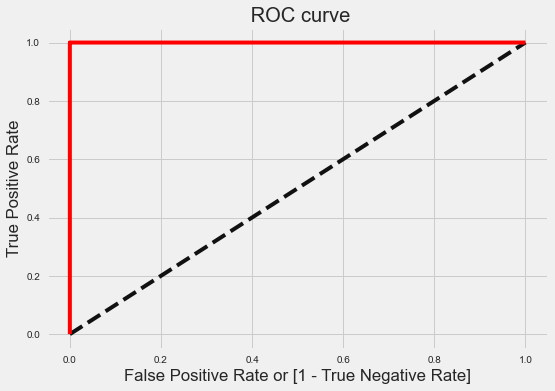

In [57]:
#from sklearn.metrics import roc_curve
y_pred_proba = xgb_classifer.predict_proba(X)[:,1]
fpr, tpr, thresholds = roc_curve(y, y_pred_proba)
auc=roc_auc_score(y,y_pred_proba)
print('Area Under the Curve[AUC]: ',auc)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr ,color='red',label='logit model ( area  = %0.2f)'%auc)
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title(' ROC curve')
plt.show()

In [58]:
plot_learning_curve(xgb_classifer, 'XGBoost Classifier', X_test, y_test)

## K-Fold Cross Validation: On Final Model

In [59]:
from sklearn.model_selection import KFold, cross_val_score
cv = KFold(n_splits=5, random_state=1, shuffle=True) 


model = xgb_classifer= XGBClassifier(n_estimators=200,max_depth=6,booster="gbtree",learning_rate=0.005)

scores = cross_val_score(model, X, y, scoring='accuracy', verbose=1,
                         cv=cv)
print("Cross Val Accuracy:\n",scores)
#view RMSE
print("Mean Accuracy:\n",(np.mean(scores)))
print("Standard deviation of Accuracies:\n",(np.std(scores)))     

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Cross Val Accuracy:
 [0.99996994 0.99998998 0.99995658 0.99997662 0.99997662]
Mean Accuracy:
 0.9999739493593356
Standard deviation of Accuracies:
 1.0853138635315864e-05


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 11.2min finished


#### Plotting the results of KFold Cross Validation

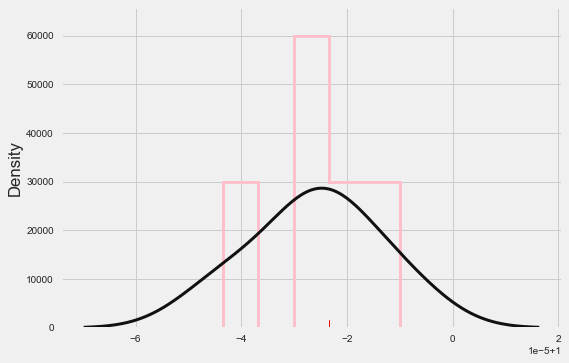

In [60]:
sns.distplot(scores,rug=True,hist=True,kde=True,rug_kws={"color": "red"},
                   kde_kws={"color": "k", "lw": 3, "label": "KDE"},
             hist_kws={"histtype": "step", "linewidth": 3,
                          "alpha": 1, "color": "pink"})
plt.show()

# Finalizing Model

In [80]:
Accuracy=[]
Precision=[]
Recall=[]
Fscore=[]
logloss=[]
hamming_loss=[]

In [81]:
xgb_classifer= XGBClassifier(n_estimators=200,max_depth=6,booster="gbtree",learning_rate=0.005)
xgb_classifer.fit(X,y)
xgb_train_predict=xgb_classifer.predict(X)

#Accuracy
Accuracy.append(metrics.accuracy_score(y, xgb_train_predict) * 100)
#Precision
# Precision = TP / (TP + FP) (Where TP = True Positive, TN = True Negative, FP = False Positive, FN = False Negative).
Precision.append(precision_score(y, xgb_train_predict, pos_label=1))
#Recall
# Recall = TP / (TP + FN)
Recall.append(recall_score(y, xgb_train_predict, pos_label=1))
#f1-score
# F - scores are a statistical method for determining accuracy accounting for both precision and recall.
Fscore.append(f1_score(y,xgb_train_predict, pos_label=1))
#logloss
logloss.append(log_loss(y, xgb_classifer.predict_proba(X)))
#Hammingloss
hamming_loss.append(metrics.hamming_loss(y,xgb_train_predict))

In [82]:
df_1= pd.DataFrame(Accuracy, index= ['XGB_Classifier'], columns=['Accuracy']) 
df_2= pd.DataFrame(Precision, index= ['XGB_Classifier'], columns=['Precision'])
df_3= pd.DataFrame(Recall, index= ['XGB_Classifier'], columns=['Recall'])
df_4= pd.DataFrame(Fscore, index= ['XGB_Classifier'], columns=['F1_score'])
df_5= pd.DataFrame(logloss, index= ['XGB_Classifier'], columns=['log-loss'])
df_6= pd.DataFrame(hamming_loss, index= ['XGB_Classifier'], columns=['hamming_loss'])

In [83]:
Model_scale1 = pd.concat([df_1, df_2,df_3, 
                         df_4, df_5, df_6], axis=1)

In [84]:
Model_scale1.sort_values(by=['Accuracy'])

,Accuracy,Precision,Recall,F1_score,log-loss,hamming_loss
XGB_Classifier,99.997863,0.999987,0.999971,0.999979,0.203047,0.000021


#### Inferences:
    ->The accuracy of the XGBoost model  For Complete training is good.
    ->The average precision score is very good.
    ->The f1-score of the model is good and Precision Recall Curve is also very good.
    ->The confusion matrix is showing less wrong prediction.
    ->The Log loss is good
    ->Hamming Loss is Nearly about 0 which is ideal performance
    
    
    

### Features  Importance to the model learnt

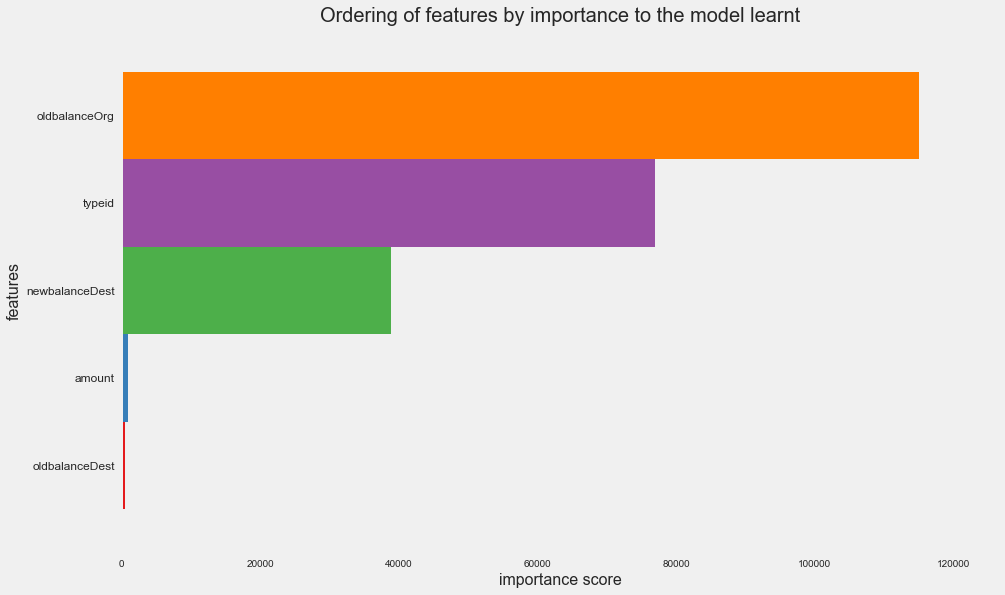

In [86]:
fig = plt.figure(figsize = (14, 9))
ax = fig.add_subplot(111)

colours = plt.cm.Set1(np.linspace(0, 1, 9))

ax = plot_importance(xgb_classifer, height = 1, grid = False,color = colours, \
                     show_values = False, importance_type = 'cover', ax = ax, max_num_features=6);
for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(2)
        
ax.set_xlabel('importance score', size = 16);
ax.set_ylabel('features', size = 16);
ax.set_yticklabels(ax.get_yticklabels(), size = 12);
ax.set_title('Ordering of features by importance to the model learnt', size = 20);


#### Inference:

    The figure shows that the new feature oldbalorigin, type, newbaldest are the most relevant feature for the model.The features are ordered based on the number of samples affected by splits on those features.



### Deployment
### Saving Model ( as pickle file)

In [87]:
import joblib

In [ ]:
import pickle
from pickle import dump
from pickle import load
from joblib import dump, load
import joblib

In [88]:
joblib.dump(xgb_classifer, 'Xgb_classifer_model_intelligence1.pkl') 

['Xgb_classifer_model_intelligence1.pkl']

In [89]:
loaded_model = joblib.load('Xgb_classifer_model_intelligence1.pkl')

In [90]:
real_values = np.array([339682.13, 339682.13, 0.0, 0.00, 339682.13, 2]).reshape(1, -1)

In [91]:
loaded_model.predict(real_values)

array([0])

## Next we will work on deployment